In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline 

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [4]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

In [5]:
X.shape

(1000, 2)

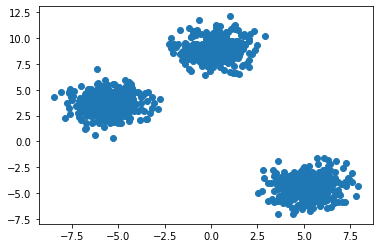

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [11]:
from sklearn.cluster import KMeans

In [12]:
##Manual Process 
##Elbow Method to select the K value 
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [13]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.5571928929403,
 991.8899785187884,
 853.5867610072107,
 754.5344380919564,
 669.006134106432,
 577.6332598271092,
 531.4220481870644]

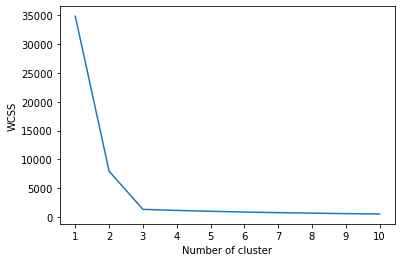

In [15]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [16]:
##K=3 from the graph 
kmeans=KMeans(n_clusters=3,init='k-means++')

In [18]:
y_labels=kmeans.fit_predict(X_train)

In [19]:
y_labels

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2,
       2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1,

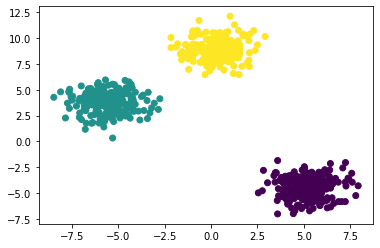

In [21]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [23]:
y_pred=kmeans.predict(X_test)

In [24]:
y_pred

array([2, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2,
       0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2,
       0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2,

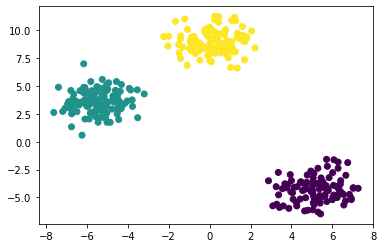

In [26]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [27]:
##knee locator
!pip install kneed

In [30]:
from kneed import KneeLocator

In [34]:
Knee=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
Knee.elbow

3

In [40]:
##performane metrics
##Silhoutte score
from sklearn.metrics import silhouette_score

In [41]:
silhoutee_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhoutee_coefficients.append(score)

In [42]:
silhoutee_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.3335462490364863,
 0.3469970797796958,
 0.33992376372696786,
 0.34651811680098216,
 0.3395946860525018]

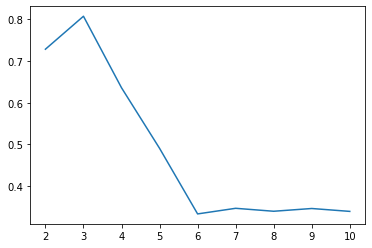

In [43]:
plt.plot(range(2,11),silhoutee_coefficients)

# Hierarichal Clustering 

In [44]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn import datasets

In [45]:
iris=datasets.load_iris()

In [46]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [47]:
iris_data=pd.DataFrame(iris.data)

In [48]:
iris_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
iris_data.columns=iris.feature_names

In [50]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()

In [53]:
X_scaled=scaler.fit_transform(iris_data)

In [54]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [56]:
X.shape

(1000, 2)

In [55]:
X_scaled.shape

(150, 4)

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA(n_components=2)

In [59]:
pca

PCA(n_components=2)

In [60]:
pca_scaled=pca.fit_transform(X_scaled)

In [61]:
pca_scaled.shape

(150, 2)

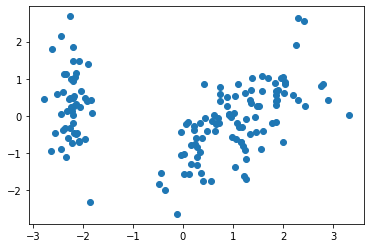

In [62]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

In [63]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [64]:
##Aglomerative Clustering 
##TO construct a dendogram 
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Eucledian Distance')

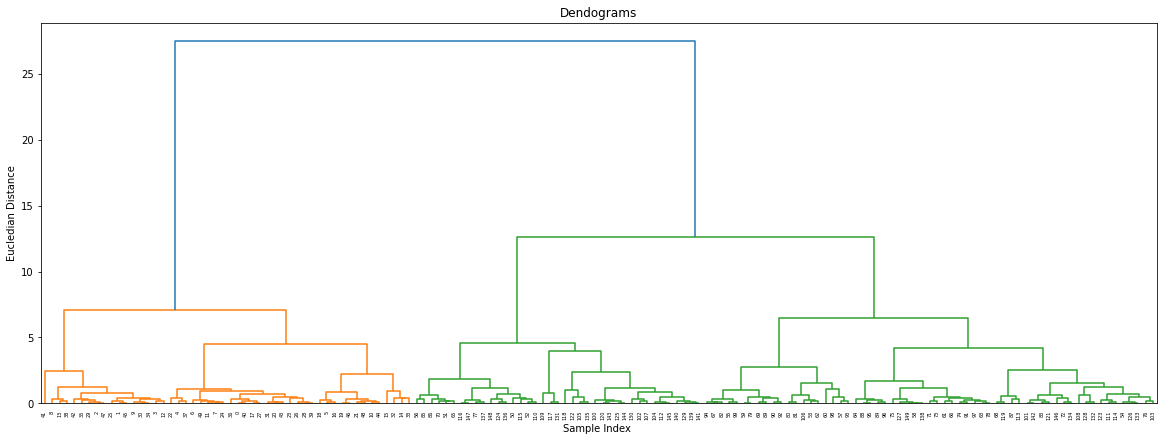

In [66]:
plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title("Dendograms")
plt.xlabel('Sample Index ')
plt.ylabel('Eucledian Distance')

In [67]:
from sklearn.cluster import AgglomerativeClustering

In [68]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [69]:
cluster.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

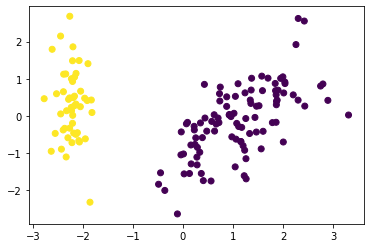

In [70]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [78]:
from sklearn.metrics import silhouette_score
silhoutee_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    silhoutee_coefficients.append(score)

In [79]:
silhoutee_coefficients

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

# DBSCAN Clustering

In [81]:
from sklearn.cluster import DBSCAN

In [82]:
from sklearn.datasets import make_moons

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
X,y=make_moons(n_samples=250,noise=0.05)

In [86]:
X

array([[ 1.78693664, -0.05308042],
       [ 0.10550647,  0.9597594 ],
       [ 0.017402  ,  0.31134932],
       [ 1.84687109, -0.12518354],
       [-0.51256821,  0.77719042],
       [ 0.12050685,  0.22227592],
       [ 1.02151152,  0.20954014],
       [ 0.97481269, -0.46370653],
       [ 1.44236314, -0.42498643],
       [ 0.10015345,  0.91011367],
       [-0.141181  ,  0.99569   ],
       [ 0.37211401, -0.31603602],
       [ 1.03122993,  0.27995714],
       [-0.26128338,  0.99932503],
       [ 1.9895822 ,  0.19747842],
       [ 0.46879255,  0.83397878],
       [ 0.0674845 ,  0.94935935],
       [-0.97187377,  0.29029834],
       [-0.82102151,  0.4777671 ],
       [ 1.61250902, -0.30025091],
       [ 1.48832753, -0.37871661],
       [ 1.69171331, -0.22569806],
       [-0.91617789,  0.58052463],
       [ 0.4978491 , -0.34968437],
       [ 1.24354713, -0.49243607],
       [ 1.04402418,  0.30297146],
       [-0.41491125,  0.90156328],
       [ 1.55520109, -0.32240587],
       [ 1.93923603,

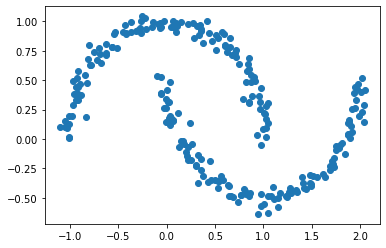

In [87]:
plt.scatter(X[:,0],X[:,1])

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler=StandardScaler()

In [91]:
X_scaled=scaler.fit_transform(X)

In [92]:
from sklearn.cluster import DBSCAN

In [93]:
dbcan=DBSCAN(eps=0.5)

In [94]:
dbcan.fit(X_scaled)

DBSCAN()

In [95]:
dbcan.labels_

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

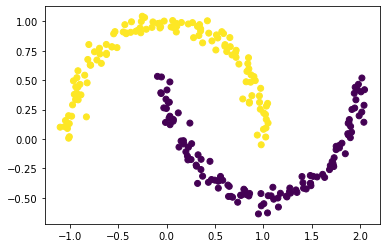

In [96]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)

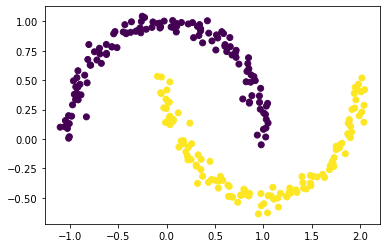

In [97]:
plt.scatter(X[:,0],X[:,1],c=y)